Zad 1:
Oblicz wartość całki z poprzedniego laboratorium ∫1<-0 (4/(1 +x^2) dx,
korzystając z:
(a) kwadratur adaptacyjnych trapezów,
(b) kwadratur adaptacyjnych Gaussa-Kronroda.
Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej. Wyniki dodaj do wykresu uzyskanego w poprzednim laboratorium. Przydatna będzie funkcjascipy.integrate.quadvec. Na liczbę ewaluacji funkcji podcałkowej można wpływać pośrednio, zmieniając wartość dopuszczalnego błędu (tolerancji). Przyjmij wartości tolerancji z zakresu od 100 do 10^-14. Liczba ewalulacji funkcji pod-całkowej zwracana jest w zmiennej info[’neval’].

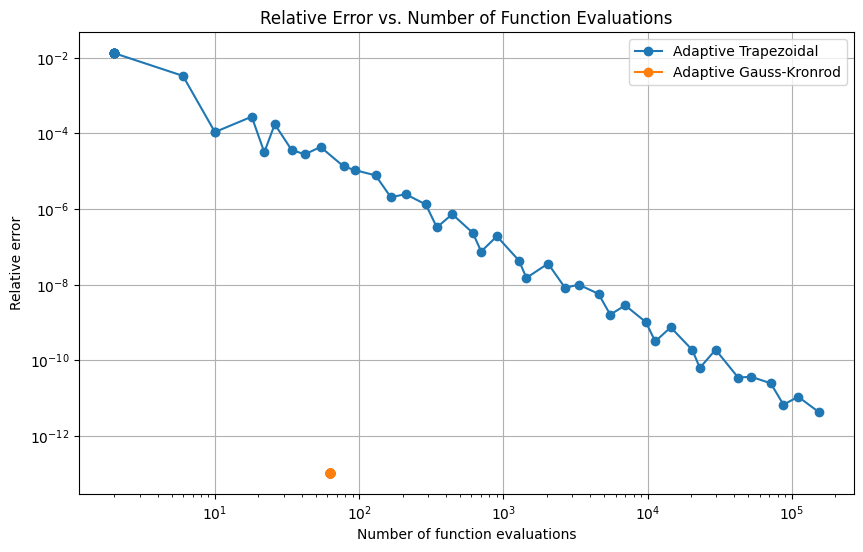

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
from scipy.integrate import quad_vec, simps, trapz
from scipy.special import roots_legendre

sys.setrecursionlimit(10**5)

# Funkcja do całkowania
def f(x):
    return 4 / (1 + x**2)

# Adaptacyjne trapezy
def adaptive_trapezoidal_rule(f, a, b, tol):
    btrap = (f(a) + f(b)) / 2 * (b - a)
    mid = (a + b) / 2
    tltrap = ((f(a) + f(mid)) / 2 * (mid - a) + (f(mid) + f(b)) / 2 * (b - mid))
    neval = 2  # Początkowa liczba ewaluacji funkcji podcałkowej
    if abs(btrap - tltrap) < tol:
        return tltrap, neval

    integral_left, neval_left = adaptive_trapezoidal_rule(f, a, mid, tol)
    integral_right, neval_right = adaptive_trapezoidal_rule(f, mid, b, tol)
    neval += neval_left + neval_right
    return integral_left + integral_right, neval

# Adaptacyjny Gauss-Kronrod
def adaptive_gauss_kronrod_rule(f, a, b, tol):
    # Węzły i wagi dla kwadratury Gaussa-Kronroda (n=3)
    x = np.array([-0.7745966692414834, 0, 0.7745966692414834])
    w = np.array([5/9, 8/9, 5/9])
    
    h = (b - a) / 2
    x_mapped = (x + 1) * h + a
    integral_approx = np.sum(w * f(x_mapped)) * h
    
    c = (a + b) / 2
    integral_subinterval_left, neval_left = adaptive_gauss_kronrod_rule(f, a, c, tol / 2)
    integral_subinterval_right, neval_right = adaptive_gauss_kronrod_rule(f, c, b, tol / 2)
    neval = neval_left + neval_right + 3  # Dodajemy 3 ewaluacje funkcji podcałkowej dla punktów Gaussa-Kronroda
    error = np.abs((integral_subinterval_left + integral_subinterval_right - integral_approx) / integral_approx)
    
    if error < tol:
        return integral_subinterval_left + integral_subinterval_right, neval
    else:
        return integral_subinterval_left + integral_subinterval_right, neval

# Dane
tolerances = np.logspace(2, -14, num=50)
integral_true = math.pi

# Obliczenia dla metody adaptacyjnych trapezów
errors_adaptive_trapezoidal = []
nevals_adaptive_trapezoidal = []
for tol in tolerances:
    integral, neval = adaptive_trapezoidal_rule(f, 0, 1, tol)
    error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_trapezoidal.append(error)
    nevals_adaptive_trapezoidal.append(neval)

# Obliczenia dla metody adaptacyjnego Gaussa-Kronroda
errors_adaptive_gauss_kronrod = []
nevals_adaptive_gauss_kronrod = []
for tol in tolerances:
    #integral, neval = adaptive_gauss_kronrod_rule(f, 0, 1, tol)
    integral, error, info = quad_vec(f, 0, 1, epsabs = tol, full_output=True)
    neval = info.neval
    #error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_gauss_kronrod.append(error)
    nevals_adaptive_gauss_kronrod.append(neval)

# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(nevals_adaptive_trapezoidal, errors_adaptive_trapezoidal, label='Adaptive Trapezoidal', marker='o')
plt.plot(nevals_adaptive_gauss_kronrod, errors_adaptive_gauss_kronrod, label='Adaptive Gauss-Kronrod', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()


Zadanie 2:
Powtórz obliczenia z poprzedniego oraz dzisiejszego laboratoriumdla całek

In [2]:
def f2(x):
    return np.sqrt(x) * np.log(x)

In [3]:
def f3(x, a = 0.001, b = 0.004):
    return 1 / ((x-0.3)**2 + a) + 1 / ((x-0.9)**2 + b) - 6

In [4]:
def true_f3(a, b):
    return (1 / np.sqrt(a)) * (np.arctan((1-0.3)/np.sqrt(a)) + np.arctan(0.3/np.sqrt(a))) + \
            (1 / np.sqrt(b)) * (np.arctan((1-0.9)/np.sqrt(b)) + np.arctan(0.9/np.sqrt(b))) - 6

In [5]:
# Metoda prostokątów (mid-point rule)
def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        x_mid = a + (i + 0.5) * h
        integral += f(x_mid)
    integral *= h
    return integral

In [6]:
# Metoda trapezów
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

In [7]:
# Dane
m_values = np.arange(1, 26)
n_values = 2 ** m_values + 1

In [8]:
# Obliczenia dla poprzedniego laboratorium funkcja 3
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []
integral_true = -4/9
for n in n_values:
    #integral_true, _ = quad(f, 0, 1)
    integral_midpoint = midpoint_rule(f2, 0, 1, n)
    integral_trapezoidal = trapezoidal_rule(f2, 0.00001, 1, n)
    #integral_trapezoidal = simps(f(np.linspace(0, 1, n)), np.linspace(0, 1, n))
    integral_simpson = simps(f2(np.linspace(0.00001, 1, n)), np.linspace(0, 1, n))
    error_midpoint = np.abs((integral_midpoint - integral_true) / integral_true)
    error_trapezoidal = np.abs((integral_trapezoidal - integral_true) / integral_true)
    error_simpson = np.abs((integral_simpson - integral_true) / integral_true)
    errors_midpoint.append(error_midpoint)
    errors_trapezoidal.append(error_trapezoidal)
    errors_simpson.append(error_simpson)

/tmp/ipykernel_80372/4156535763.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simpson = simps(f2(np.linspace(0.00001, 1, n)), np.linspace(0, 1, n))


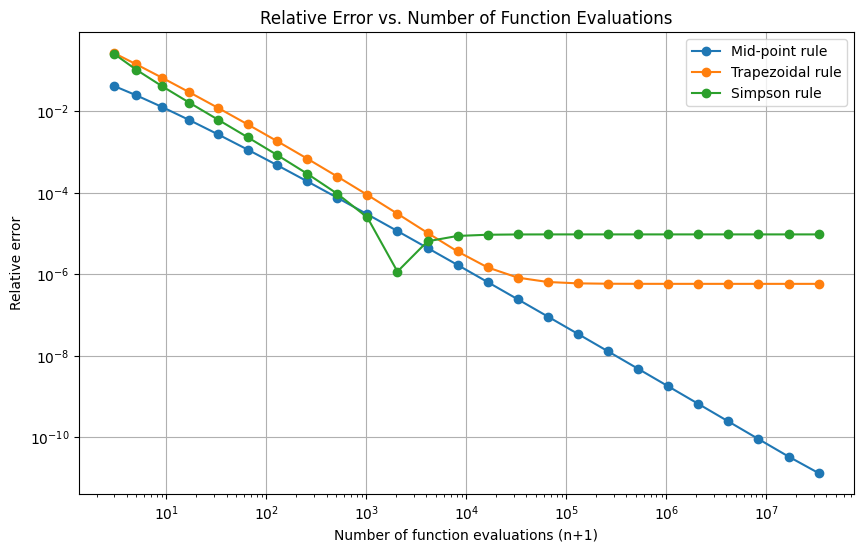

In [9]:
# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_midpoint, label='Mid-point rule', marker='o')
plt.plot(n_values, errors_trapezoidal, label='Trapezoidal rule', marker='o')
plt.plot(n_values, errors_simpson, label='Simpson rule', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations (n+1)')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Obliczanie rzędu zbieżności dla metody prostokątów
p_midpoint = np.log(errors_midpoint[-2] / errors_midpoint[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody trapezów
p_trapezoidal = np.log(errors_trapezoidal[-2] / errors_trapezoidal[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody Simpsona
p_simpson = np.log(errors_simpson[-2] / errors_simpson[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

print("Empiryczne rzędy zbieżności:")
print("Metoda prostokątów (mid-point rule):", p_midpoint)
print("Metoda trapezów:", p_trapezoidal)
print("Metoda Simpsona:", p_simpson)

Empiryczne rzędy zbieżności:
Metoda prostokątów (mid-point rule): -0.027502361160731008
Metoda trapezów: -3.9184593221104884e-08
Metoda Simpsona: -3.122275203202053e-12


In [10]:
# Obliczenia dla poprzedniego laboratorium funkcja 3
errors_midpoint_2 = []
errors_trapezoidal_2 = []
errors_simpson_2 = []
integral_true_2 = true_f3(0.001, 0.004)
for n in n_values:
    #integral_true, _ = quad(f, 0, 1)
    integral_midpoint = midpoint_rule(f3, 0, 1, n)
    integral_trapezoidal = trapezoidal_rule(f3, 0.00001, 1, n)
    #integral_trapezoidal = simps(f(np.linspace(0, 1, n)), np.linspace(0, 1, n))
    integral_simpson = simps(f3(np.linspace(0.00001, 1, n)), np.linspace(0, 1, n))
    error_midpoint = np.abs((integral_midpoint - integral_true_2) / integral_true_2)
    error_trapezoidal = np.abs((integral_trapezoidal - integral_true_2) / integral_true_2)
    error_simpson = np.abs((integral_simpson - integral_true_2) / integral_true_2)
    errors_midpoint_2.append(error_midpoint)
    errors_trapezoidal_2.append(error_trapezoidal)
    errors_simpson_2.append(error_simpson)

/tmp/ipykernel_80372/589921362.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simpson = simps(f3(np.linspace(0.00001, 1, n)), np.linspace(0, 1, n))


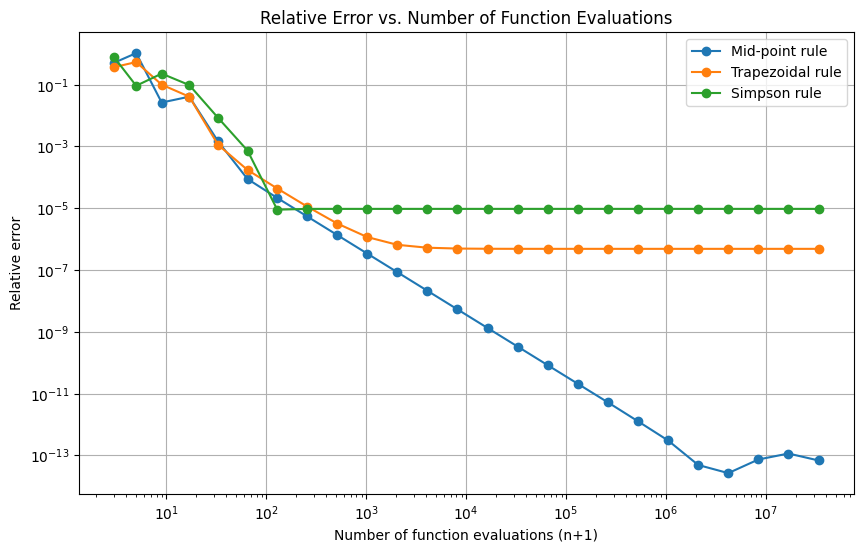

In [11]:
# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_midpoint_2, label='Mid-point rule', marker='o')
plt.plot(n_values, errors_trapezoidal_2, label='Trapezoidal rule', marker='o')
plt.plot(n_values, errors_simpson_2, label='Simpson rule', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations (n+1)')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Obliczanie rzędu zbieżności dla metody prostokątów
p_midpoint = np.log(errors_midpoint_2[-2] / errors_midpoint_2[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody trapezów
p_trapezoidal = np.log(errors_trapezoidal_2[-2] / errors_trapezoidal_2[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

# Obliczanie rzędu zbieżności dla metody Simpsona
p_simpson = np.log(errors_simpson_2[-2] / errors_simpson_2[-1]) / np.log(1/n_values[-2] / 1/n_values[-1])

print("Empiryczne rzędy zbieżności:")
print("Metoda prostokątów (mid-point rule):", p_midpoint)
print("Metoda trapezów:", p_trapezoidal)
print("Metoda Simpsona:", p_simpson)

Empiryczne rzędy zbieżności:
Metoda prostokątów (mid-point rule): -0.015191199799764049
Metoda trapezów: -1.7899358582422068e-09
Metoda Simpsona: 6.857578368265953e-12


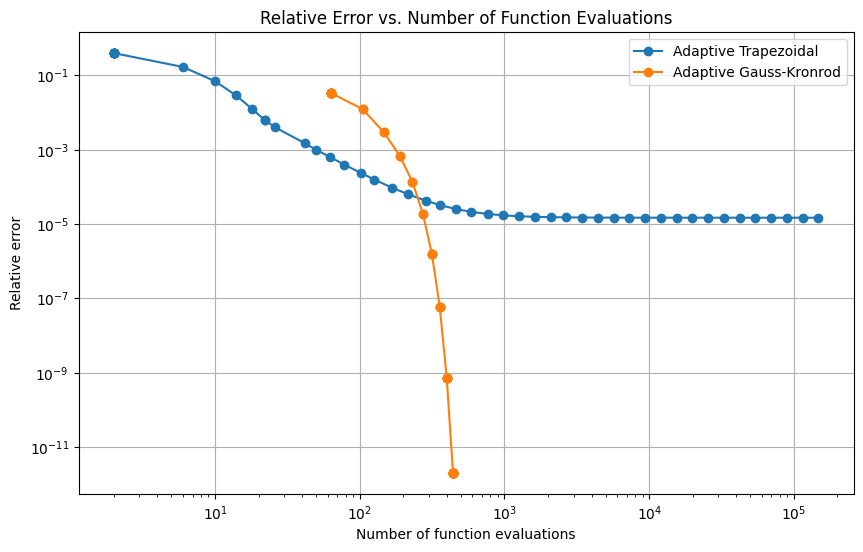

In [12]:
# Dane
tolerances = np.logspace(2, -14, num=50)
integral_true = -4/9

# Obliczenia dla metody adaptacyjnych trapezów
errors_adaptive_trapezoidal = []
nevals_adaptive_trapezoidal = []
for tol in tolerances:
    integral, neval = adaptive_trapezoidal_rule(f2, 0.0001, 1, tol)
    error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_trapezoidal.append(error)
    nevals_adaptive_trapezoidal.append(neval)

# Obliczenia dla metody adaptacyjnego Gaussa-Kronroda
errors_adaptive_gauss_kronrod = []
nevals_adaptive_gauss_kronrod = []
for tol in tolerances:
    #integral, neval = adaptive_gauss_kronrod_rule(f, 0, 1, tol)
    integral, error, info = quad_vec(f2, 0.0001, 1, epsabs = tol, full_output=True)
    neval = info.neval
    #error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_gauss_kronrod.append(error)
    nevals_adaptive_gauss_kronrod.append(neval)

# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(nevals_adaptive_trapezoidal, errors_adaptive_trapezoidal, label='Adaptive Trapezoidal', marker='o')
plt.plot(nevals_adaptive_gauss_kronrod, errors_adaptive_gauss_kronrod, label='Adaptive Gauss-Kronrod', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

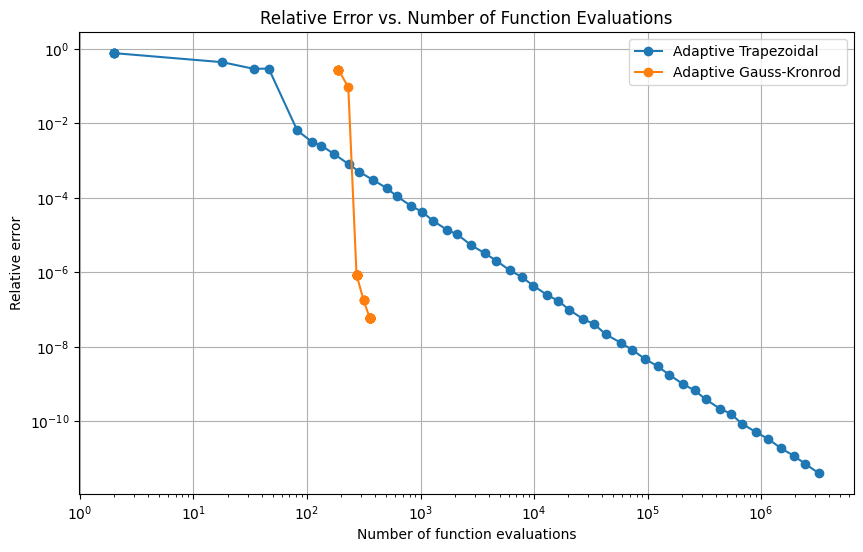

In [13]:
# Dane
tolerances = np.logspace(2, -14, num=50)
integral_true = true_f3(0.001, 0.004)

# Obliczenia dla metody adaptacyjnych trapezów
errors_adaptive_trapezoidal = []
nevals_adaptive_trapezoidal = []
for tol in tolerances:
    integral, neval = adaptive_trapezoidal_rule(f3, 0, 1, tol)
    error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_trapezoidal.append(error)
    nevals_adaptive_trapezoidal.append(neval)

# Obliczenia dla metody adaptacyjnego Gaussa-Kronroda
errors_adaptive_gauss_kronrod = []
nevals_adaptive_gauss_kronrod = []
for tol in tolerances:
    #integral, neval = adaptive_gauss_kronrod_rule(f, 0, 1, tol)
    integral, error, info = quad_vec(f3, 0, 1, epsabs = tol, full_output=True)
    neval = info.neval
    #error = np.abs((integral - integral_true) / integral_true)
    errors_adaptive_gauss_kronrod.append(error)
    nevals_adaptive_gauss_kronrod.append(neval)

# Wykres błędów względnych
plt.figure(figsize=(10, 6))
plt.plot(nevals_adaptive_trapezoidal, errors_adaptive_trapezoidal, label='Adaptive Trapezoidal', marker='o')
plt.plot(nevals_adaptive_gauss_kronrod, errors_adaptive_gauss_kronrod, label='Adaptive Gauss-Kronrod', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()